In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager as fm
from matplotlib import rcParams
import matplotlib as mpl
from datetime import datetime
import time
import cv2 as cv 
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from tqdm import tqdm

# 한글 폰트 적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

# 역 좌표 매칭

In [ ]:
df = pd.read_pickle('/content/drive/My Drive/모공전/빅콘/제출용/final_dataframe_2.pickle')
df_nosun = df[['역명', 'date', '시간', '하차']]

In [ ]:
import re
for i in range(len(df_nosun['역명'])):
    df_nosun['역명'][i] = re.findall('[가-힣]+', df_nosun['역명'][i])[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(set(df_nosun['역명']))

223

In [ ]:
nosundo = pd.read_excel('/content/drive/My Drive/모공전/빅콘/지하철_좌표_최종.xlsx')
nosundo.isna().sum()

역명      0
X     158
Y     158
dtype: int64

In [ ]:
nosundo.dropna(inplace=True)

In [ ]:
nosundo.reset_index(drop=True, inplace=True)

In [ ]:
nosundo = nosundo.sort_values(by = '역명', ascending=True)

In [ ]:
df_nosun = pd.merge(df_nosun, nosundo, how = 'outer', on = '역명')

In [ ]:
df_nosun = df_nosun[['역명', 'X', 'Y', '하차', 'date', '시간']]

In [ ]:
df_nosun.isna().sum()

역명          0
X       50820
Y       50820
하차        256
date      256
시간        256
dtype: int64

In [ ]:
df_nosun

,역명,X,Y,하차,date,시간
0,가락시장,3017.0,2503.0,92.0,2020-02-01,5.0
1,가락시장,3017.0,2503.0,301.0,2020-02-01,6.0
2,가락시장,3017.0,2503.0,328.0,2020-02-01,7.0
3,가락시장,3017.0,2503.0,535.0,2020-02-01,8.0
4,가락시장,3017.0,2503.0,635.0,2020-02-01,9.0
...,...,...,...,...,...,...
544751,화전,1020.0,1287.0,NaN,NaT,NaN
544752,화정,1221.0,908.0,NaN,NaT,NaN
544753,회기,2472.0,1503.0,NaN,NaT,NaN
544754,회룡,2265.0,225.0,NaN,NaT,NaN


In [ ]:
df_nosun[df_nosun['하차'].isna()].index

Int64Index([544500, 544501, 544502, 544503, 544504, 544505, 544506, 544507,
            544508, 544509,
            ...
            544746, 544747, 544748, 544749, 544750, 544751, 544752, 544753,
            544754, 544755],
           dtype='int64', length=256)

In [ ]:
df_nosun.drop(df_nosun[df_nosun['하차'].isna()].index, inplace=True)

In [ ]:
df_nosun.reset_index(drop=True, inplace=True)

In [ ]:
df_nosun[df_nosun['역명']=='효창공원앞']

,역명,X,Y,하차,date,시간
542080,효창공원앞,1722.0,2012.0,24.0,2020-02-01,5.0
542081,효창공원앞,1722.0,2012.0,108.0,2020-02-01,6.0
542082,효창공원앞,1722.0,2012.0,109.0,2020-02-01,7.0
542083,효창공원앞,1722.0,2012.0,157.0,2020-02-01,8.0
542084,효창공원앞,1722.0,2012.0,238.0,2020-02-01,9.0
...,...,...,...,...,...,...
544495,효창공원앞,1722.0,2012.0,163.0,2020-05-31,20.0
544496,효창공원앞,1722.0,2012.0,155.0,2020-05-31,21.0
544497,효창공원앞,1722.0,2012.0,140.0,2020-05-31,22.0
544498,효창공원앞,1722.0,2012.0,88.0,2020-05-31,23.0


In [ ]:
set(df_nosun[df_nosun['X'].isna()]['역명'])

{'강남',
 '강동구청',
 '강변',
 '개롱',
 '고려대',
 '광명사거리',
 '광흥창',
 '구로디지털단지',
 '구산',
 '구의',
 '길음',
 '낙성대',
 '남구로',
 '남태령',
 '녹사평',
 '서울',
 '을지로',
 '이수',
 '종로'}

In [ ]:
# 위 목록 직접 채워줌
df_nosun.loc[df_nosun['역명']=='서울', 'X'] = 1810    
df_nosun.loc[df_nosun['역명']=='서울', 'Y'] = 1859

In [ ]:
# 을지로, 이수, 종로 제거
df_nosun.drop(df_nosun[df_nosun['역명']=='을지로'].index, inplace=True)
df_nosun.drop(df_nosun[df_nosun['역명']=='이수'].index, inplace=True)
df_nosun.drop(df_nosun[df_nosun['역명']=='종로'].index, inplace=True)

In [ ]:
df_nosun.reset_index(drop=True, inplace=True)

In [ ]:
df_nosun.isna().sum()

역명      0
X       0
Y       0
하차      0
date    0
시간      0
dtype: int64

In [ ]:
# df_nosun.to_pickle('df_nosun.pickle')
# pd.read_pickle('df_nosun.pickle')

,역명,X,Y,하차,date,시간
0,가락시장,3017.0,2503.0,92.0,2020-02-01,5.0
1,가락시장,3017.0,2503.0,301.0,2020-02-01,6.0
2,가락시장,3017.0,2503.0,328.0,2020-02-01,7.0
3,가락시장,3017.0,2503.0,535.0,2020-02-01,8.0
4,가락시장,3017.0,2503.0,635.0,2020-02-01,9.0
...,...,...,...,...,...,...
532395,효창공원앞,1722.0,2012.0,163.0,2020-05-31,20.0
532396,효창공원앞,1722.0,2012.0,155.0,2020-05-31,21.0
532397,효창공원앞,1722.0,2012.0,140.0,2020-05-31,22.0
532398,효창공원앞,1722.0,2012.0,88.0,2020-05-31,23.0


# 로직

In [ ]:
# 0  : 날짜 / 시간대 / 카테고리 입력
# 1-1: 지하철 역 선택
# 1-2: 이용자가 원하는 장소 선택하면 특정 반경내 data검색
# EX : 강남역, 14시 선택 시 리스트업

In [ ]:
# df_nosun.to_pickle('df_nosun_fin.pickle')
df_nosun = pd.read_pickle('/content/drive/My Drive/모공전/빅콘/지하철 역 시각화/df_nosun_fin.pickle')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)


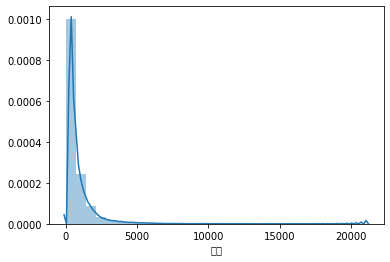

In [ ]:
sns.distplot(df_nosun['하차'], bins = 30)
# plt.xticks([0, 10000])
plt.show()

In [ ]:
df_nosun.describe()

,X,Y,하차,시간
count,532400.000000,532400.000000,532400.000000,532400.000000
mean,2049.277273,1934.286364,722.220054,14.500000
std,693.978396,479.684849,1103.892366,5.766287
min,450.000000,480.000000,0.000000,5.000000
25%,1518.750000,1671.250000,193.000000,9.750000
50%,2142.500000,1937.000000,398.000000,14.500000
75%,2586.500000,2313.500000,816.000000,19.250000
max,3393.000000,2726.000000,21102.000000,24.000000


In [ ]:
def Graph(station):
  plt.figure(figsize=(15, 7))
  plt.plot(df_nosun[df_nosun['역명'] == station]['date'], df_nosun[df_nosun['역명'] == station]['하차'])
  plt.title('{} 하차'.format(station))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_

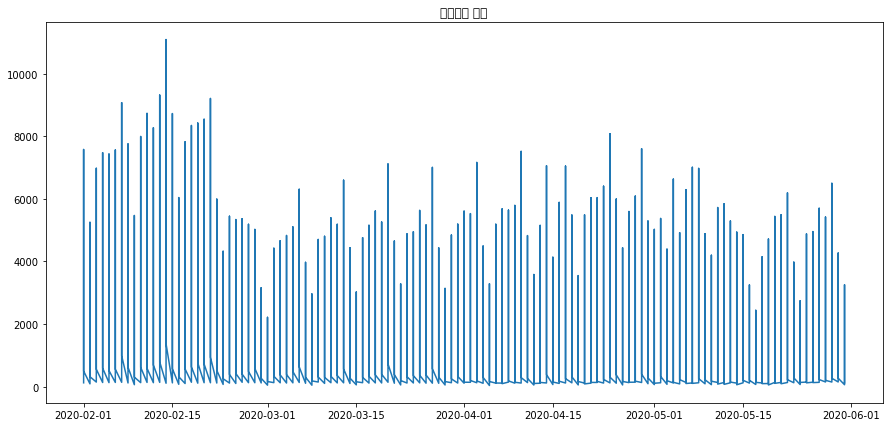

In [ ]:
Graph('홍대입구')

In [ ]:
# 밖으로 나간 역 수정
# df_nosun.loc[df_nosun['역명']=='길동', 'X'] = 3189    
# df_nosun.loc[df_nosun['역명']=='길동', 'Y'] = 2037
# df_nosun.loc[df_nosun['역명']=='강동', 'X'] = 3123    
# df_nosun.loc[df_nosun['역명']=='미아', 'Y'] = 1118
# df_nosun.loc[df_nosun['역명']=='합정', 'X'] = 1341
# df_nosun.loc[df_nosun['역명']=='김포공항', 'Y'] = 1770
# df_nosun.loc[df_nosun['역명']=='이태원', 'X'] = 1995

- 4단계 : 파랑(25% 미만) / 초록(25%이상 50%미만) 
/ 노랑(50%이상 75%이하) / 빨강(75%이상)

In [ ]:
# mean 이상시 yellow
image = cv.imread('/content/drive/My Drive/모공전/빅콘/지하철 역 시각화/지하철노선도이미지.jpg',cv2.IMREAD_UNCHANGED)

grey_color = (64,64,64)
red_color= (0,0,255)
yellow_color = (0, 153, 255)
green_color = (0, 255, 0)
blue_color = (255, 0, 0)
station_ = list(set(df_nosun['역명']))
station_.sort()

def sigakhwa(date, time):
    global image
    for station in tqdm(station_): 
      # RED
        if df_nosun[(df_nosun['date'] == date)&(df_nosun['시간'] == time)&(df_nosun['역명'] == station)]['하차'].values[0] >= df_nosun[df_nosun['역명'] == station].describe().loc['75%']['하차']:
            loc_X = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][0])
            loc_Y = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][1])
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), grey_color,25)
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), red_color,20)
      
     # YELLOW
        elif df_nosun[(df_nosun['date'] == date)&(df_nosun['시간'] == time)&(df_nosun['역명'] == station)]['하차'].values[0] >= df_nosun[df_nosun['역명'] == station].describe().loc['50%']['하차']:
            loc_X = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][0])
            loc_Y = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][1])
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), grey_color,25)
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), yellow_color,20)
      
    # GREEN
        elif df_nosun[(df_nosun['date'] == date)&(df_nosun['시간'] == time)&(df_nosun['역명'] == station)]['하차'].values[0] >= df_nosun[df_nosun['역명'] == station].describe().loc['25%']['하차']:
            loc_X = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][0])
            loc_Y = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][1])
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), grey_color,25)
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), green_color,20)
       
    # BLUE
        else:
            loc_X = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][0])
            loc_Y = int(df_nosun[df_nosun['역명'] == station][['X', 'Y']].values[0][1])
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), grey_color,25)
            image = cv.line(image,(loc_X, loc_Y), (loc_X, loc_Y), blue_color,20)
      
    return cv2_imshow(image)

In [ ]:
date = input('날짜 (예:2020-02-01) : ')
time = float(input('시간 (예:7) : '))
sigakhwa(pd.to_datetime(date), time)

Output hidden; open in https://colab.research.google.com to view.